In [ ]:
import fasttext
import fasttext.util
import time

start = time.process_time()

# fasttext.util.download_model('fr', if_exists='ignore')  # French
ft = fasttext.load_model('cc.fr.300.bin')
print("OK")

print("Time taken: ", (time.process_time() - start), " seconds")

In [2]:
start = time.process_time()

print(ft.get_word_vector('bonjour').shape)
ft.get_nearest_neighbors('bonjour')

print("Time taken: ", (time.process_time() - start), " seconds")

(300,)


[(0.875173807144165, 'bonsoir'),
 (0.809287428855896, 'bonjours'),
 (0.7799237966537476, 'Bonjour'),
 (0.760585606098175, 'boujour'),
 (0.748824417591095, 'Bonsoir'),
 (0.748317301273346, 'rebonjour'),
 (0.7253685593605042, 'bonjour.'),
 (0.7218137383460999, 're-bonjour'),
 (0.7111150622367859, '-bonjour'),
 (0.706505537033081, 'bjr')]

In [67]:
print(ft.get_word_vector('bonjour').shape)

(300,)


# ------------------------------------------------

In [102]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip -q glove.6B.zip

--2021-01-27 17:46:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-01-27 17:46:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-27 17:46:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

# ------------------------------------------------

### Get into the right directory

In [1]:
# Import the os module
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('data')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/amineamor/Desktop/Bert_Exercise
Current working directory: /Users/amineamor/Desktop/Bert_Exercise/data


In [5]:
# path_to_glove_file = os.path.join(
#     os.path.expanduser("~"), "glove.6B.100d.txt"
# )
import numpy as np

embeddings_index = {}
with open("glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


# 1) Load data

In [6]:
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import time

file_names = ['CRIM.csv', 'SOC.csv', 'COM.csv', 'CIV.csv']
dataframes = []


for file in file_names: 
    df = pd.read_csv(file, header=None)
    dataframes.append(df)

In [7]:
df = pd.concat(dataframes).rename(columns={0:'text', 1:'label'})
print("data shape: ", df.shape)
df.head()

data shape:  (27998, 2)


,text,label
0,<p>COUR D'APPEL DE ROUEN </p>\n<p>CHAMBRE DE L...,CRIM
1,\n<br>COUR D'APPEL DE MONTPELLIER <br>CHAMBRE ...,CRIM
2,\nDOSSIER N 08 / 00863 <br>ARRÊT DU 21 AVRIL 2...,CRIM
3,\nCOUR D'APPEL DE MONTPELLIER <br>CHAMBRE DE L...,CRIM
4,"\n<p>\n<br clear=""none"">COUR D'APPEL DE MONTPE...",CRIM


# 2) Preprocess text data

### For each legal decision (row), we select the first 150 words since we believe most of the crucial information is at the beginning of the text. 

In [8]:
num_words_select = 150
text_list = [" ".join(row.split(" ")[:num_words_select]) for row in df['text']]

### For each decision text, we remove some irrelevant information such as xml tags (meta-data), punctuation, common words (e.g "la", "de", "comme"...) and dates. This data does not discriminate between the different types of decisions (i.e "SOC", "CIV", "COM" and "CRIM") and should therefore be ignored. 

In [9]:
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # refer to common words
import re

def remove_xml_tags(text):
    no_xml = BeautifulSoup(text, 'lxml').text
    return no_xml

def remove_punctuation(text):
    no_punc = text.translate(str.maketrans('', '', string.punctuation))
    return no_punc

# remove common french words
def remove_stop_words(text): 
    no_stop_words = [w for w in text.split() if w not in stopwords.words('french')]
    return " ".join(no_stop_words)

def remove_new_lines(text):
    no_new_lines = text.replace("\n"," ")
    return no_new_lines

def remove_dates(text):
    months_regex = "((Janvier(?i)|Février(?i)|Fevrier(?i)|Mars(?i)|Avril(?i)|Mai(?i)|Juin(?i)|Juillet(?i)|Août(?i)|Aout(?i)|Septembre(?i)|Octobre(?i)|Novembre(?i)|Décembre(?i)|Decembre(?i))?)"
    year_regex = "[1-3][0-9]{3}"
    classic_date_format =  "\d\d\s"+months_regex+"\s"+year_regex
    
    text = re.sub(classic_date_format, '', text)
    text = re.sub(months_regex, '', text)
    no_dates = re.sub(year_regex, '', text)
    
    return no_dates

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amineamor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Note that the punctuation will be automatically removed later, by the Tokenizer.

In [10]:
def preprocess(text):
    text = remove_xml_tags(text)
    text = remove_new_lines(text)
#     text = remove_punctuation(text) 
#     text = remove_stop_words(text)
    output = remove_dates(text)  
    return output

In [11]:
start = time.process_time()

data = []
for text in text_list:
    new_text = preprocess(text)
    data.append(new_text)
    
print("Time taken: ", (time.process_time() - start), " seconds")

/Users/amineamor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Flags not at the start of the expression '\\d\\d\\s((Janvier(?i)|' (truncated)
/Users/amineamor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Flags not at the start of the expression '((Janvier(?i)|Févrie' (truncated)


Time taken:  112.91053000000001  seconds


In [12]:
label_mapping = {'CRIM':0,'SOC':1,'COM':2,'CIV':3}

data_labels = np.array([label_mapping[label] for label in df['label']])
data_text = np.array(data)

In [13]:
print(data_labels.shape)
print(data_text.shape)

(27998,)
(27998,)


# 3)  Tokenize and Vectorize data 

### In this section, we create a vocabulary which consists of a word-index mapping. Each word in our dataset is mapped to a unique integer.  Using this mapping, we then transform each text (list of words) into a vector representation, which is suitable to NLP models.

### The word-index mapping and the text vectorization is performed by TensorFlow's Tokenizer module

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
num_words = None # will automatically be set to the entire vocabulary size
tokenizer = Tokenizer(num_words=num_words)

### Fit the tokenizer to the dataset

#### By fitting the tokenizer to the data, we convert all the text to lowercase characters, remove punctuation and finally construct the vocabulary.

In [36]:
tokenizer.fit_on_texts(data_text)

num_words = len(tokenizer.word_index) + 1
print("number of unique words: ", num_words)

number of unique words:  78569


In [37]:
print("Word-Index Mapping: " + "\n")
for key in list(tokenizer.word_index.keys())[0:10]:
    print(key, ":", tokenizer.word_index[key])

Word-Index Mapping: 

de : 1
la : 2
du : 3
au : 4
cour : 5
le : 6
par : 7
à : 8
en : 9
barreau : 10


In [27]:
# list(tokenizer.word_index.items())[0:5]
# embeddings_index.get('de')

In [38]:
num_tokens = num_words
embedding_dim = 100
hits = 0
misses = 0
word_index = tokenizer.word_index

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 22765 words (55803 misses)


In [39]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=True,
)

# --------------------------------------

### Vectorize train and test set

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
print('The scikit-learn version is {}.'.format(sklearn.__version__))

x_train, x_test, y_train, y_test = train_test_split(data_text, data_labels, test_size=0.2, random_state=42)

# texts_to_sequences converts text into vector representations
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

The scikit-learn version is 0.24.0.


### Create tokenizer inverse map

In [31]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def tokens_to_string(tokens):
    # Map from tokens back to words.
    words = [inverse_map[token] for token in tokens if token != 0]
    
    # Concatenate all words.
    text = " ".join(words)

    return text

tokens_to_string(x_train[5])

"grosses délivréesrépublique française aux parties le au nom du peuple français cour d'appel de paris pôle 4 chambre 1 arrêt du no 3 pages numéro d'inscription au répertoire général 15 06899 décision déférée à la cour ordonnance du cour d'appel de paris rg no 14 3 demandeur au déféré monsieur sylvain x y né le à brazzaville congo demeurant représenté par me daniel merchat avocat au barreau de seine saint denis toque 155 assisté sur l'audience par me joseph soudri de la scp soudri delpla avocat au barreau de pontoise toque no 19 substitué par me meryem afarkous avocat au barreau de seine saint denis toque pb155 madame sylvanie z épouse y née le à brazzaville demeurant représentée par me daniel merchat avocat au barreau de seine saint denis toque 155 assistée sur l'audience"

# 4) Pad and Truncate vectors

### In order to process the batch of data, the RNN requires to have sequences of the same length.  To do so, we need to pad (add 0s) and truncate (shorten) vectors to guarantee they have the same dimensions.

### If we set max_tokens (length of vectors) to the length of the largest vector, we will add too much padding and waste a lot of memory.

### A good compromise is to set max_tokens to the average length + 2 standard deviations. This way, we theoretically cover 95% of the data (assuming it is normally distributed) and avoid excessive padding.

In [32]:
num_tokens = [len(tokens) for tokens in x_train + x_test]
num_tokens = np.array(num_tokens)
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)

data_coverage = np.sum(num_tokens < max_tokens) / len(num_tokens)
print("Setting max_tokens to", max_tokens, "covers", np.round(data_coverage, decimals=2)*100, "% of the data")

Setting max_tokens to 164 covers 96.0 % of the data


In [33]:
pad = 'post' # adding zeros at the end of vectors when length < max_tokens

x_train = pad_sequences(x_train, maxlen=max_tokens,
                            padding=pad, truncating=pad)

x_test = pad_sequences(x_test, maxlen=max_tokens,
                           padding=pad, truncating=pad)

print(x_train.shape)
print(x_test.shape)

(22398, 164)
(5600, 164)


### Hot-encode target data

In [32]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
y_train_enc = enc.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test_enc = enc.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

y_test_enc[0:5]

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

# 5) Train a Recurrent Neural Network (GRU)

In [47]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_text, data_labels, test_size=0.2, random_state=42)
print(x_train.shape)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
y_train_enc = enc.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test_enc = enc.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

y_test_enc[0:5]

(22398,)


array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [41]:
# emb = []
# counter = 0
# for sentence in x_train:
#     counter +=1
#     l = sentence.split(" ")
#     vecs = np.array([ft.get_word_vector(token) for token in l])
#     if counter%100 == 0:
#         print("counter : ", counter)
#     emb.append(vecs)

# embeddings = np.array(emb)
# embeddings.shape

In [99]:
embeddings.shape

(22398,)

In [48]:
from tensorflow.keras import Model
embedding_size = 64

# model = Sequential()

# model.add(Embedding(input_dim=num_words,
#                     output_dim=embedding_size,
#                     input_length=max_tokens,
#                     name='layer_embedding'))

# # model.add(GRU(units=32, return_sequences=True))
# # model.add(GRU(units=16, return_sequences=True))
# # model.add(GRU(units=8))
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding="same"))
# model.add(GlobalAveragePooling1D())
# model.add(Dense(4, activation='softmax'))

inputs = tf.keras.layers.Input(shape=(max_tokens,)) 
# embedding = Embedding(input_dim=num_words,
#                     output_dim=embedding_size,
#                     input_length=max_tokens,
#                     name='layer_embedding')(inputs)
embedding = embedding_layer(inputs)

conv1d = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding="same")(embedding)
global_avg = tf.keras.layers.GlobalAveragePooling1D()(conv1d)
outputs = Dense(4, activation='softmax')(global_avg)

model = Model(inputs=inputs, outputs=[outputs], name="text_classification_model")


print("Length of each input vector: ", max_tokens)
print("Embedding size: ", embedding_size)
print("Number of words in vocabulary: ", num_words)
print("Number of words in vocabulary: ", num_tokens)

Length of each input vector:  164
Embedding size:  64
Number of words in vocabulary:  78569
Number of words in vocabulary:  78571


In [49]:
# from tensorflow.keras.layers import Conv1D
# from tensorflow.keras.layers import GlobalAveragePooling1D
# # The inputs are 128-length vectors with 10 timesteps, and the batch size is 4.
# input_shape = (1, 10, 132)
# x = tf.random.normal(input_shape)
# y = Conv1D(
# filters=32, kernel_size=3, activation='relu', padding="valid", input_shape=(None,132,4))(x)
# y = GlobalAveragePooling1D()(y)
# print(y.shape)
model.summary()

Model: "text_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 164)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 164, 100)          7857100   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 164, 32)           9632      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 7,866,864
Trainable params: 7,866,864
Non-trainable params: 0
_________________________________________________________________


In [50]:
optimizer = Adam(lr=1e-3)
model.compile(loss='CategoricalCrossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "text_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 164)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 164, 100)          7857100   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 164, 32)           9632      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 7,866,864
Trainable params: 7,866,864
Non-trainable params: 0
_________________________________________________________________


### To prevent overfitting, we use early stopping which stops the training as soon as the validation performance decreases for 2 consecutive epochs.

In [51]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train_enc, validation_split=0.10, epochs=20, batch_size=64, callbacks=[callback])

Epoch 1/20


UnimplementedError:  Cast string to float is not supported
	 [[node text_classification_model/Cast (defined at <timed exec>:2) ]] [Op:__inference_train_function_865]

Function call stack:
train_function


### Visualize the Training-Validation performance

In [52]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

### On the test set, the model achieves an accuracy of 97.3% and an F1-score of 97.4%.

In [53]:
%%time
result = model.evaluate(x_test, y_test_enc)

175/175 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9784
CPU times: user 1.12 s, sys: 85.2 ms, total: 1.21 s
Wall time: 789 ms


In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

preds = model.predict(x_test)
y_pred = [np.argmax(p) for p in preds]

print("F1 score: ", f1_score(y_test, y_pred, average='weighted'), "\n")

F1 score:  0.9797005653218821 



In [191]:
print("Confusion Matrix: ")
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
print(conf_matrix)

Confusion Matrix: 
[[  73    1    0    2]
 [   0 2462    1   10]
 [   0    2  386   48]
 [   1   15   33 2566]]


Recall Confusion Matrix: 


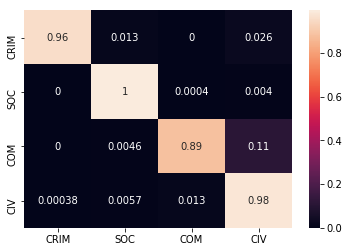

In [103]:
import seaborn as sns
labels = list(label_mapping.keys())
print("Recall Confusion Matrix: ")
recall_conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3], normalize='true')
sns.heatmap(recall_conf_matrix, annot=True, xticklabels=labels, yticklabels=labels)

Precision Confusion Matrix: 


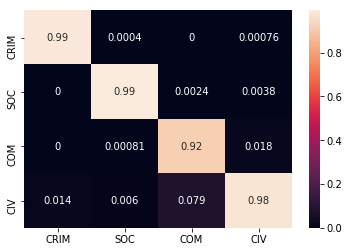

In [104]:
print("Precision Confusion Matrix: ")
precision_conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2,3], normalize='pred')
sns.heatmap(precision_conf_matrix, annot=True, xticklabels=labels, yticklabels=labels)

### We notice that despite the significant imbalance between classes (from 100 to 10 000 rows per class), the model achieves an excellent performance overall. The confusion matrix shows that the model results in both high recall and high precision for each class.

### It seems that the model is a little less accurate when discriminating between COM and CIV. Indeed, it wrongly classifies 16% of the COM samples as CIV samples. To address this, we could for instance increase the size of the COM dataset to help the model learn more specific representations of COM decisions.



### This is how to use the RNN model to predict the class of a given text sample:

In [57]:
model

In [54]:
k=1 
sample = x_test[k].reshape(1,-1)
print("SAMPLE: ")
print(tokens_to_string(sample[0]))
print("-----------------------------------")
print("VECTOR REPRESENTATION OF SAMPLE: ")
print(sample)
print("-----------------------------------")

p = np.argmax(model.predict(sample))
y = y_test[k]

inverse_label_mapping = {label_mapping[k]:k for k in label_mapping.keys()}
print("CLASS PREDICTION: ", inverse_label_mapping[p])
print("ACTUAL CLASS: ", inverse_label_mapping[y])

SAMPLE: 
par jugement en date du le tribunal des affaires de sécurité sociale du département du cher a débouté monsieur x de l'opposition qu'il avait formée à l'encontre d'une contrainte qui lui avait été délivrée à la requête de la caisse de mutualité sociale agricole du cher qui par la suite sera désignée comme étant la cmsa pour un montant de 131 134 90 francs le monsieur x a relevé appel de cette décision dont il sollicite de la cour la réformation en ce qu'elle a rejeté son opposition il fait en effet valoir qu'une étude attentive des dispositions législatives et des travaux préparatoires tant de la loi du 8 que de celle du 9 qu'avant l'entrée en vigueur de cette loi les caisses de mutualité sociale agricole devaient respecter les dispositions légales et réglementaires relatives à la constitution des
-----------------------------------
VECTOR REPRESENTATION OF SAMPLE: 
[[    7    33     9    43     3     6    36    19   170     1   201    37
      3  2640     3  2870    12  1859  

# 6) Conclusion

### Overall, we conclude that the RNN model achieves a very good performance of approximately 97% on the classification of law decisions. Since we only select the first 150 words of each decision, we prove that the beginning of the decision text includes sufficient information to learn discriminative patterns for all 4 classes.

### In this task, we show how text classification methods can be applied to the legal domain using decision data from social, criminal, commercial and civil justice. However, since the vocabulary is very specific to law decisions, we should not expect the model to generalize well to other areas where the lexical field is drastically different.

### Additionally, the text classification was relatively simple in this project because each decision text contains key words which are tightly connected to the classes. For instance, we always have "Chambre correctionelle" at the start of a decision related to criminal justice. Similarly, we have "Chambre sociale", "Chambre civile" and "Chambre commerciale" which often appear respectively in decisions for social, civil and commercial justice. Such obvious connections are not always available in law documents and therefore we cannot expect our NLP model to generalize well for a variety of classification tasks in the legal domain.

### In general, it can be very complex to automate decisions based on law documents because there are several abstract legal concepts. Also, as time goes by, laws constantly change and legals professionals apply new set of rules. Therefore, the changing nature of law documents also represents a major challenge to NLP in legal contexts.

# Transfer Learning and Fine-Tuning with Bert model 

# ------------------------------------------------------------------------------------

# Multi-Lingual Bert Model

In [24]:
import os
import shutil
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optmizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

/Users/amineamor/anaconda3/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:43: UserWarning: You are currently using a nightly version of TensorFlow (2.5.0-dev20210125). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


In [27]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import time

start = time.process_time()

tfhub_handle_preprocess = "/Users/amineamor/Desktop/Bert_Exercise/universal-sentence-encoder-cmlm_multilingual-preprocess_1"
tfhub_handle_encoder = "/Users/amineamor/Desktop/Bert_Exercise/universal-sentence-encoder-cmlm_multilingual-base-br_1"
# tfhub_handle_encoder= "/Users/amineamor/Desktop/Bert_Exercise/LaBSE_1"

preprocessor = hub.KerasLayer(tfhub_handle_preprocess)
encoder = hub.KerasLayer(tfhub_handle_encoder)


print("Time taken: ", (time.process_time() - start), " seconds")

Time taken:  26.796678000000156  seconds


In [28]:
def normalization(embeds):
    norms = np.linalg.norm(embeds, 2, axis=1, keepdims=True)
    return embeds/norms

english_sentences = tf.constant(["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."])
italian_sentences = tf.constant(["cane", "I cuccioli sono carini.", "Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."])
japanese_sentences = tf.constant(["犬", "子犬はいいです", "私は犬と一緒にビーチを散歩するのが好きです"])

english_embeds = encoder(preprocessor(english_sentences))["default"]
japanese_embeds = encoder(preprocessor(japanese_sentences))["default"]
italian_embeds = encoder(preprocessor(italian_sentences))["default"]

# For semantic similarity tasks, apply l2 normalization to embeddings
english_embeds = normalization(english_embeds)
japanese_embeds = normalization(japanese_embeds)
italian_embeds = normalization(italian_embeds)

print (np.matmul(english_embeds, np.transpose(italian_embeds)))

# English-Japanese similarity
# print (np.matmul(english_embeds, np.transpose(japanese_embeds)))

# # Italian-Japanese similarity
# print (np.matmul(italian_embeds, np.transpose(japanese_embeds)))

[[0.85326886 0.13352822 0.18850595]
 [0.08426897 0.82343245 0.04995594]
 [0.00991928 0.03902387 0.83902705]]


In [36]:
english_embeds = encoder(preprocessor(english_sentences))

In [37]:
english_embeds

{'sequence_output': <tf.Tensor: shape=(3, 128, 768), dtype=float32, numpy=
 array([[[-4.72020954e-01, -3.76940072e-01,  1.48768127e-01, ...,
           1.33556873e-03,  3.96905422e-01, -5.27486920e-01],
         [-7.20707357e-01, -3.99831772e-01,  6.41182214e-02, ...,
          -2.70681679e-01,  6.29583657e-01, -7.20922589e-01],
         [-4.72020566e-01, -3.76940072e-01,  1.48768485e-01, ...,
           1.33558549e-03,  3.96905631e-01, -5.27486801e-01],
         ...,
         [-7.06253231e-01,  4.33176756e-05,  7.89681256e-01, ...,
          -1.18273884e-01, -1.33401349e-01, -7.10888982e-01],
         [-7.45827794e-01,  2.38586426e-01,  6.59201682e-01, ...,
           2.01628834e-01,  2.11421698e-01, -8.00969005e-01],
         [-7.10339844e-01,  9.82609466e-02,  6.97509527e-01, ...,
           9.69182700e-02,  7.70546347e-02, -7.72472739e-01]],
 
        [[-2.38048613e-01, -1.06148887e+00,  6.02737427e-01, ...,
          -4.34462190e-01,  5.59268177e-01,  1.09937623e-01],
         [-5

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_text, data_labels, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
y_train_enc = enc.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test_enc = enc.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

y_test_enc[0:5]

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [31]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(4, activation='softmax', name='classifier')(net)
    return tf.keras.Model(text_input, net)


classifier_model = build_classifier_model()


NameError: name 'text_test' is not defined

In [33]:
text_test = ['this is such an amazing movie!']
bert_raw_result = classifier_model(tf.constant(text_test))
print((bert_raw_result))

tf.Tensor([[0.40353522 0.3925422  0.18949722 0.01442525]], shape=(1, 4), dtype=float32)


In [34]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
preprocessing (KerasLayer)      {'input_word_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
BERT_encoder (KerasLayer)       {'sequence_output':  470926849   preprocessing[0][0]              
                                                                 preprocessing[0][1]              
                                                                 preprocessing[0][2]              
______________________________________________________________________________________________

In [40]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
metrics = tf.metrics.Accuracy()
epochs = 5


classifier_model.compile(loss=loss, metrics=metrics)

In [41]:
history = classifier_model.fit(x_train, y_train_enc, validation_split=0.10, epochs=epochs, batch_size=64)

Epoch 1/5
  2/315 [..............................] - ETA: 11:51:57 - loss: 2.2113 - accuracy: 0.0000e+00

KeyboardInterrupt: 

# ----------------------------------------------------------